In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/flights.csv")

In [3]:
airport = pd.read_csv('/content/airports.csv')
airlines = pd.read_csv('/content/airlines.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62006 entries, 0 to 62005
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 62006 non-null  int64  
 1   MONTH                62006 non-null  int64  
 2   DAY                  62006 non-null  int64  
 3   DAY_OF_WEEK          62006 non-null  int64  
 4   AIRLINE              62006 non-null  object 
 5   FLIGHT_NUMBER        62006 non-null  int64  
 6   TAIL_NUMBER          61937 non-null  object 
 7   ORIGIN_AIRPORT       62006 non-null  object 
 8   DESTINATION_AIRPORT  62006 non-null  object 
 9   SCHEDULED_DEPARTURE  62006 non-null  int64  
 10  DEPARTURE_TIME       60573 non-null  float64
 11  DEPARTURE_DELAY      60573 non-null  float64
 12  TAXI_OUT             60543 non-null  float64
 13  WHEELS_OFF           60543 non-null  float64
 14  SCHEDULED_TIME       62005 non-null  float64
 15  ELAPSED_TIME         60398 non-null 

In [5]:
data.shape

(62006, 31)

In [6]:
data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,62006.0,62006.0,62006.000000,62006.000000,62006.000000,62006.000000,60573.000000,60573.000000,60543.000000,60543.000000,...,62005.000000,60504.000000,60398.000000,62005.000000,62005.000000,21960.000000,21960.000000,21960.000000,21960.000000,21960.000000
mean,2015.0,1.0,2.536174,5.536174,2250.175354,1337.972728,1359.219916,19.902646,16.779975,1382.062815,...,1514.336666,1487.392354,18.388092,0.002145,0.023772,12.900729,0.084973,17.918169,26.137477,1.932741
std,0.0,0.0,1.100413,1.100413,1818.197365,475.261900,497.380856,45.677545,9.818741,498.586843,...,496.722771,542.439947,48.313411,0.046265,0.152340,24.326709,1.927194,43.915945,42.281340,12.866282
min,2015.0,1.0,1.000000,4.000000,1.000000,5.000000,1.000000,-39.000000,1.000000,1.000000,...,1.000000,1.000000,-65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.0,2.000000,5.000000,783.250000,935.000000,941.000000,-3.000000,11.000000,956.000000,...,1126.000000,1112.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.0,3.000000,6.000000,1692.000000,1331.000000,1348.000000,3.000000,14.000000,1401.000000,...,1532.000000,1525.000000,5.000000,0.000000,0.000000,4.000000,0.000000,5.000000,11.000000,0.000000
75%,2015.0,1.0,4.000000,7.000000,3372.000000,1730.000000,1754.000000,25.000000,19.000000,1808.000000,...,1925.000000,1929.000000,28.000000,0.000000,0.000000,18.000000,0.000000,19.000000,35.000000,0.000000
max,2015.0,1.0,4.000000,7.000000,7438.000000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,...,2359.000000,2400.000000,1384.000000,1.000000,1.000000,570.000000,107.000000,1380.000000,891.000000,453.000000


In [7]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
62001,2015,1,4,7,OO,4548,N161PQ,SLC,FCA,2155,...,2341.0,-12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
62002,2015,1,4,7,OO,4805,N459SW,MSP,RAP,2155,...,NaN,NaN,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN
62003,2015,1,4,7,OO,5531,N930SW,DEN,GTF,2155,...,39.0,44.0,0.0,0.0,NaN,0.0,0.0,37.0,7.0,0.0
62004,2015,1,4,7,OO,7388,N560SW,SLC,EKO,2155,...,2145.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
62005,2015,1,4,7,DL,558,N901DE,ATL,BNA,2156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62001,2015,1,4,7,OO,4548,N161PQ,SLC,FCA,2155,...,2341.0,-12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
62002,2015,1,4,7,OO,4805,N459SW,MSP,RAP,2155,...,NaN,NaN,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN
62003,2015,1,4,7,OO,5531,N930SW,DEN,GTF,2155,...,39.0,44.0,0.0,0.0,NaN,0.0,0.0,37.0,7.0,0.0
62004,2015,1,4,7,OO,7388,N560SW,SLC,EKO,2155,...,2145.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [11]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE'])

In [12]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [13]:
airport.head(10)


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [14]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [15]:
Data_NULL = data.isnull().sum()*100/data.shape[0]
Data_NULL

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.111280
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          2.311067
DEPARTURE_DELAY         2.311067
TAXI_OUT                2.359449
WHEELS_OFF              2.359449
SCHEDULED_TIME          0.001613
ELAPSED_TIME            2.593297
AIR_TIME                2.593297
DISTANCE                0.001613
WHEELS_ON               2.422346
TAXI_IN                 2.422346
SCHEDULED_ARRIVAL       0.001613
ARRIVAL_TIME            2.422346
ARRIVAL_DELAY           2.593297
DIVERTED                0.001613
CANCELLED               0.001613
CANCELLATION_REASON    97.622811
AIR_SYSTEM_DELAY       64.584073
SECURITY_DELAY         64.584073
AIRLINE_DELAY          64.584073
LATE_AIRCRAFT_DELAY    64.584073
WEATHER_DE

In [16]:
# Dropping of subset of null values
data1 = data.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [17]:
data1.shape

(60398, 31)

In [18]:
data1.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER                0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME             0
DEPARTURE_DELAY            0
TAXI_OUT                   0
WHEELS_OFF                 0
SCHEDULED_TIME             0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
WHEELS_ON                  0
TAXI_IN                    0
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME               0
ARRIVAL_DELAY              0
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    60398
AIR_SYSTEM_DELAY       38438
SECURITY_DELAY         38438
AIRLINE_DELAY          38438
LATE_AIRCRAFT_DELAY    38438
WEATHER_DELAY          38438
dtype: int64

In [19]:
# Creting Dataset w.r.t different Types of Delays
data11 = data1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
data11 = data11.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [20]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21960 entries, 27 to 62003
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AIRLINE              21960 non-null  object 
 1   ORIGIN_AIRPORT       21960 non-null  object 
 2   DESTINATION_AIRPORT  21960 non-null  object 
 3   DEPARTURE_DELAY      21960 non-null  float64
 4   TAXI_OUT             21960 non-null  float64
 5   ELAPSED_TIME         21960 non-null  float64
 6   DISTANCE             21960 non-null  float64
 7   TAXI_IN              21960 non-null  float64
 8   ARRIVAL_DELAY        21960 non-null  float64
 9   AIR_SYSTEM_DELAY     21960 non-null  float64
 10  SECURITY_DELAY       21960 non-null  float64
 11  AIRLINE_DELAY        21960 non-null  float64
 12  LATE_AIRCRAFT_DELAY  21960 non-null  float64
 13  WEATHER_DELAY        21960 non-null  float64
dtypes: float64(11), object(3)
memory usage: 2.5+ MB


In [21]:
# Creating Dataset by removing null values by not focussing fully on different types of Delays
data2 = data1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [22]:
data2.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [23]:
data2.shape

(60398, 25)

In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60398 entries, 0 to 62004
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 60398 non-null  int64  
 1   MONTH                60398 non-null  int64  
 2   DAY                  60398 non-null  int64  
 3   DAY_OF_WEEK          60398 non-null  int64  
 4   AIRLINE              60398 non-null  object 
 5   FLIGHT_NUMBER        60398 non-null  int64  
 6   TAIL_NUMBER          60398 non-null  object 
 7   ORIGIN_AIRPORT       60398 non-null  object 
 8   DESTINATION_AIRPORT  60398 non-null  object 
 9   SCHEDULED_DEPARTURE  60398 non-null  int64  
 10  DEPARTURE_TIME       60398 non-null  float64
 11  DEPARTURE_DELAY      60398 non-null  float64
 12  TAXI_OUT             60398 non-null  float64
 13  WHEELS_OFF           60398 non-null  float64
 14  SCHEDULED_TIME       60398 non-null  float64
 15  ELAPSED_TIME         60398 non-null 

In [25]:
data2.DEPARTURE_TIME.isnull().sum()

0

In [26]:
data2.DEPARTURE_TIME.dtype

dtype('float64')

In [27]:
data2.DEPARTURE_TIME

0        2354.0
1           2.0
2          18.0
3          15.0
4          24.0
          ...  
61999       5.0
62000    2242.0
62001    2200.0
62003    2242.0
62004    2153.0
Name: DEPARTURE_TIME, Length: 60398, dtype: float64

In [29]:

def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [30]:
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Actual_Departure']

0        23:54:00
1        00:02:00
2        00:18:00
3        00:15:00
4        00:24:00
           ...   
61999    00:05:00
62000    22:42:00
62001    22:00:00
62003    22:42:00
62004    21:53:00
Name: Actual_Departure, Length: 60398, dtype: object

In [31]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure'],
      dtype='object')

In [32]:
data2['Date'] = pd.to_datetime(data2[['YEAR','MONTH','DAY']])
data2.Date

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
61999   2015-01-04
62000   2015-01-04
62001   2015-01-04
62003   2015-01-04
62004   2015-01-04
Name: Date, Length: 60398, dtype: datetime64[ns]

In [61]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [70]:
data2['Weekday'] = data2['Date'].dt.day_name()


In [35]:
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Scheduled_Arrival'] =data1['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)
data2['Scheduled_Departure'] =data1['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)
data2['Actual_Arrival'] =data1['ARRIVAL_TIME'].apply(Format_Hourmin)

In [36]:
data2 = data2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [37]:
data2 = data2.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [38]:
data2 = data2.rename(columns={"AIRLINE_y":"AIRLINE"})

In [40]:
data2 = data2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
data2 = data2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [41]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'Actual_Departure', 'Date',
       'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival', 'AIRLINE',
       'IATA_CODE_x', 'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x',
       'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [42]:
data2 = data2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)

In [43]:
data2 = data2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [44]:
data2

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,04:30:00,00:05:00,04:08:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
1,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,05:09:00,00:45:00,04:55:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
2,2015,1,1,4,134,N464AS,ANC,SEA,155,140.0,...,06:33:00,01:55:00,05:58:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
3,2015,1,1,4,114,N303AS,ANC,SEA,220,209.0,...,06:40:00,02:20:00,06:28:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
4,2015,1,1,4,730,N423AS,ANC,SEA,505,457.0,...,09:30:00,05:05:00,09:16:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60318,2015,1,1,4,2571,N879AS,MEI,PIB,2055,2051.0,...,21:30:00,20:55:00,21:20:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
60319,2015,1,2,5,2570,N830AS,MEI,PIB,1440,1537.0,...,15:15:00,14:40:00,16:06:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
60320,2015,1,2,5,2571,N877AS,MEI,PIB,2055,2351.0,...,21:30:00,20:55:00,00:25:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
60321,2015,1,3,6,2571,N902EV,MEI,PIB,2055,2125.0,...,21:30:00,20:55:00,21:57:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel


In [65]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [77]:
import numpy as np
import pandas as pd
s = pd.date_range('2018-12-31', '2019-01-08', freq='D').to_series()
s.dt.dayofweek


2018-12-31    0
2019-01-01    1
2019-01-02    2
2019-01-03    3
2019-01-04    4
2019-01-05    5
2019-01-06    6
2019-01-07    0
2019-01-08    1
Freq: D, dtype: int64

In [79]:
ReqdData = pd.DataFrame(data2[['AIRLINE','Org_Airport_Name','Origin_city',
                               'Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure','Date','Weekday',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED',]])

In [46]:
data2.DEPARTURE_TIME.dtype

dtype('float64')

In [58]:
ReqdData = ReqdData.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [80]:

ReqdData.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60323 entries, 0 to 60322
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   AIRLINE              60323 non-null  object        
 1   Org_Airport_Name     60323 non-null  object        
 2   Origin_city          60323 non-null  object        
 3   Dest_Airport_Name    60323 non-null  object        
 4   Destination_city     60323 non-null  object        
 5   ORIGIN_AIRPORT       60323 non-null  object        
 6   DESTINATION_AIRPORT  60323 non-null  object        
 7   DISTANCE             60323 non-null  float64       
 8   Actual_Departure     60319 non-null  object        
 9   Date                 60323 non-null  datetime64[ns]
 10  Weekday              60323 non-null  object        
 11  Scheduled_Departure  60323 non-null  object        
 12  DEPARTURE_DELAY      60323 non-null  float64       
 13  Actual_Arrival       60291 non-

In [81]:
Flights = ReqdData
Flights

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0.0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,173.0,4.0,17.0,0.0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,170.0,11.0,17.0,0.0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,176.0,8.0,15.0,0.0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205.0,199.0,179.0,4.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60318,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69.0,20:51:00,2015-01-01,...,-4.0,21:20:00,21:30:00,-10.0,35.0,29.0,21.0,3.0,5.0,0.0
60319,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69.0,15:37:00,2015-01-02,...,57.0,16:06:00,15:15:00,51.0,35.0,29.0,17.0,4.0,8.0,0.0
60320,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69.0,23:51:00,2015-01-02,...,176.0,00:25:00,21:30:00,175.0,35.0,34.0,21.0,4.0,9.0,0.0
60321,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69.0,21:25:00,2015-01-03,...,30.0,21:57:00,21:30:00,27.0,35.0,32.0,15.0,9.0,8.0,0.0


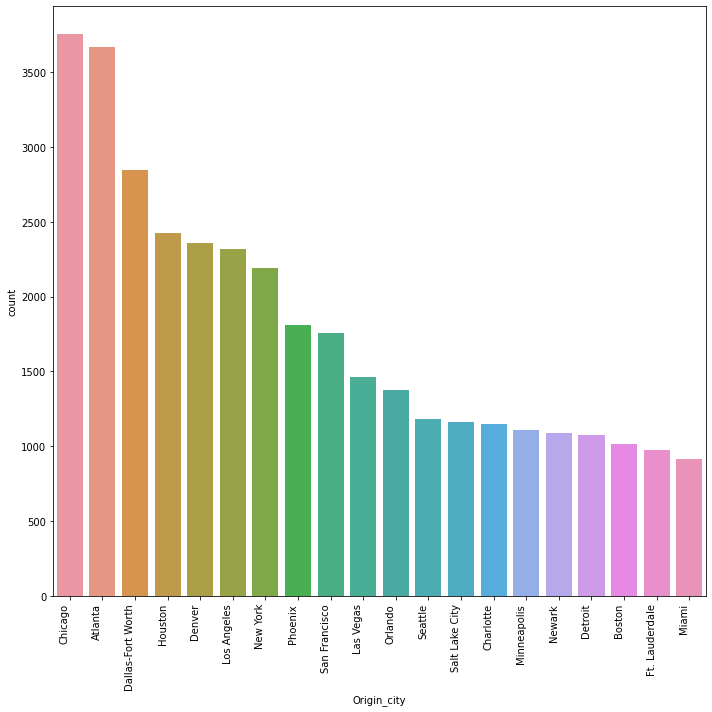

In [82]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Origin_city'], data = Flights,
              order=Flights['Origin_city'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

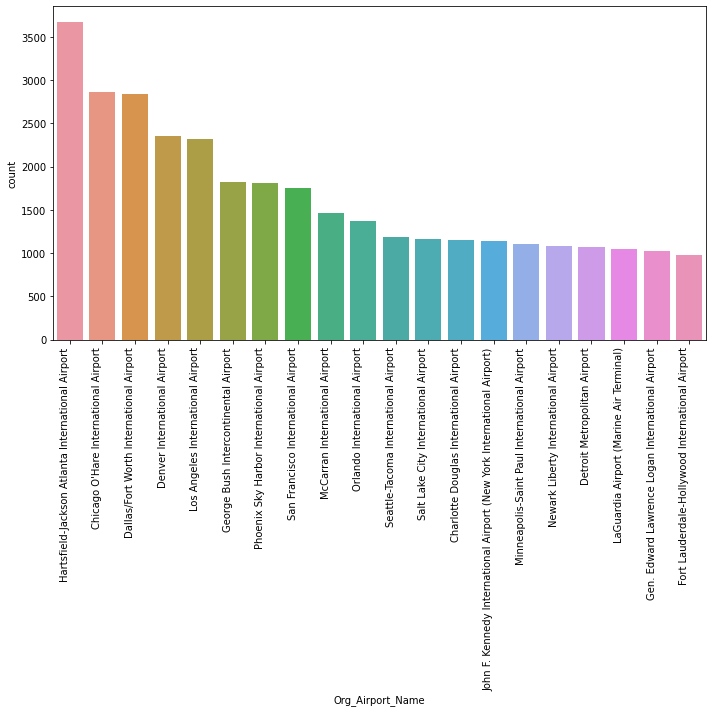

In [83]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Org_Airport_Name'], data = Flights,
              order=Flights['Org_Airport_Name'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

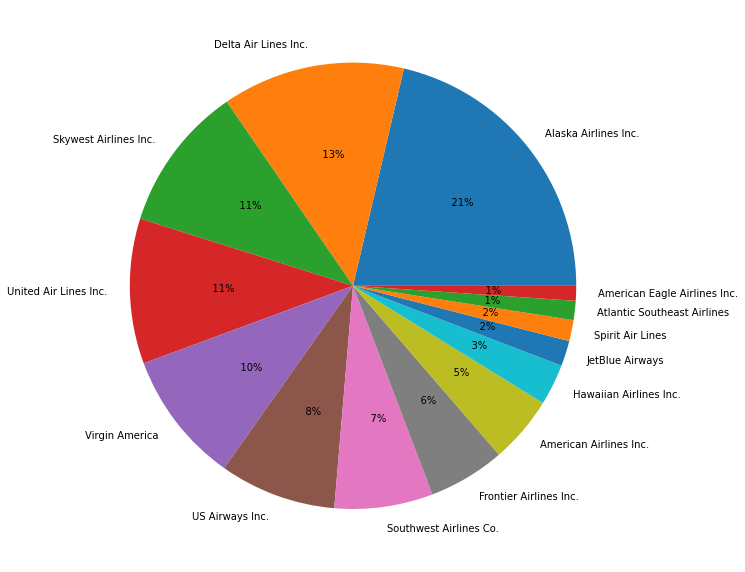

In [84]:
axis = plt.subplots(figsize=(10,14))
Name = Flights["AIRLINE"].unique()
size = Flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

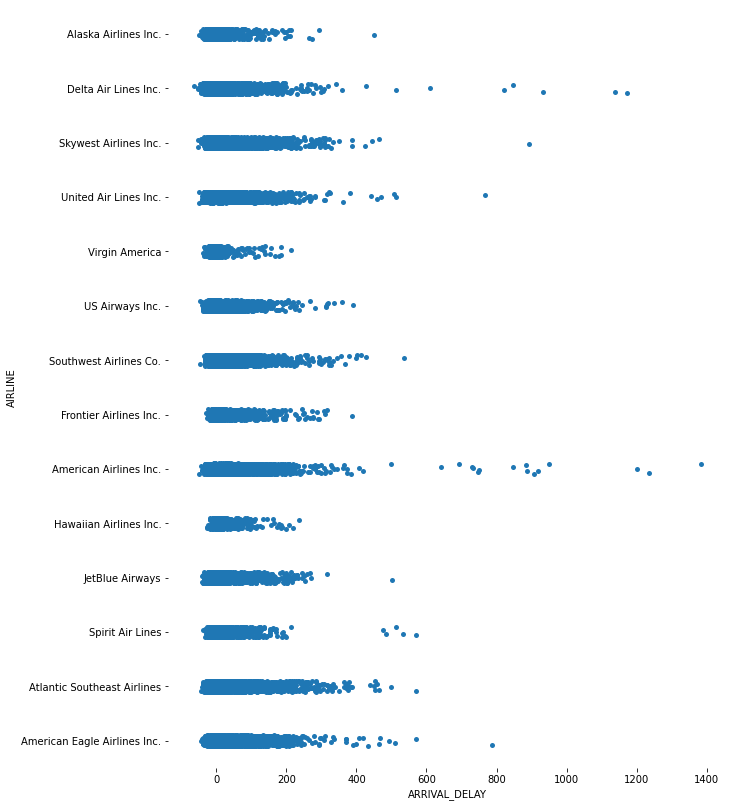

In [85]:
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data = Flights, dodge=True, jitter=True
            )
plt.show()

In [86]:
%%html
<div class='tableauPlaceholder' id='viz1569938215526' style='position: relative'><noscript><a href='#'><img alt=' ' 
src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;PH&#47;PHNKQPSZG&#47;1_rss.png' style='border: none'
/></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' 
/> <param name='embed_code_version' value='3' 
/> <param name='path' value='shared&#47;PHNKQPSZG' 
/> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;PH&#47;PHNKQPSZG&#47;1.png' 
/> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes'
/><param name='display_overlay' value='yes' 
/><param name='display_count' value='yes' /></object></div>                
<script type='text/javascript'>                   
var divElement = document.getElementById('viz1569938215526');                   
var vizElement = divElement.getElementsByTagName('object')[0];                   
vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                   
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                   
vizElement.parentNode.insertBefore(scriptElement, vizElement);               
</script>

In [87]:
Flights.head()

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0.0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,173.0,4.0,17.0,0.0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,170.0,11.0,17.0,0.0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,176.0,8.0,15.0,0.0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205.0,199.0,179.0,4.0,16.0,0.0


In [89]:
Flights1 = Flights.drop(['Org_Airport_Name','Origin_city','Dest_Airport_Name','Destination_city'],axis=1) 

In [90]:
Flights1.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE',
       'Actual_Departure', 'Date', 'Weekday', 'Scheduled_Departure',
       'DEPARTURE_DELAY', 'Actual_Arrival', 'Scheduled_Arrival',
       'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'TAXI_IN', 'TAXI_OUT', 'DIVERTED'],
      dtype='object')

In [ ]:
sns.distplot(Flights1['AIR_TIME'])
plt.show()

In [ ]:
sns.distplot(Flights1['ELAPSED_TIME'])
plt.show()

In [ ]:
sns.distplot(Flights1['TAXI_IN'])
plt.show()

In [ ]:
sns.distplot(Flights1['TAXI_OUT'])
plt.show()

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [96]:
Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)
Boost_las = AdaBoostRegressor(base_estimator=Las,random_state=2)
Boost_rid = AdaBoostRegressor(base_estimator=Rid,random_state=2)
Bg_Lin = BaggingRegressor(base_estimator=LinR,random_state=2)
Bg_las = BaggingRegressor(base_estimator=Las,random_state=2)
Bg_rid = BaggingRegressor(base_estimator=Rid,random_state=2)

In [97]:
le = LabelEncoder()

In [115]:
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])
Flights1['Weekday'] = le.fit_transform(Flights1['Weekday'])

In [99]:
Flights1 = Flights1.drop(['Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','Date','Actual_Departure'], axis = 1)

In [102]:
Flights1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60323 entries, 0 to 60322
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AIRLINE              60323 non-null  int64  
 1   ORIGIN_AIRPORT       60323 non-null  int64  
 2   DESTINATION_AIRPORT  60323 non-null  int64  
 3   DISTANCE             60323 non-null  float64
 4   Weekday              60323 non-null  int64  
 5   DEPARTURE_DELAY      60323 non-null  float64
 6   ARRIVAL_DELAY        60323 non-null  float64
 7   SCHEDULED_TIME       60323 non-null  float64
 8   ELAPSED_TIME         60323 non-null  float64
 9   AIR_TIME             60323 non-null  float64
 10  TAXI_IN              60323 non-null  float64
 11  TAXI_OUT             60323 non-null  float64
 12  DIVERTED             60323 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 6.4 MB


In [103]:
X = Flights1.drop('ARRIVAL_DELAY',axis = 1)
X.shape

(60323, 12)

In [104]:
y = Flights1['ARRIVAL_DELAY']
y.head()

0   -22.0
1   -14.0
2   -35.0
3   -12.0
4   -14.0
Name: ARRIVAL_DELAY, dtype: float64

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [106]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [107]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()

Lasso
Mean Absolute Error: 7.670202791137397
Mean Squared Error: 101.51853882513072
Root Mean Squared Error: 10.075640864239391
R2 :  0.956925085690737

Linear Regression
Mean Absolute Error: 1.5331813719785684e-13
Mean Squared Error: 4.0082608366111645e-26
Root Mean Squared Error: 2.0020641439801985e-13
R2 :  1.0

Ridge
Mean Absolute Error: 0.016688749774057852
Mean Squared Error: 0.0004675769423486762
Root Mean Squared Error: 0.021623527518623693
R2 :  0.9999998016043478

Random forest Regressor
Mean Absolute Error: 6.831076974084103
Mean Squared Error: 108.97607338232856
Root Mean Squared Error: 10.439160568854593
R2 :  0.9537608098281479

Decision Tree Regressor
Mean Absolute Error: 4.624400729402663
Mean Squared Error: 50.72798331215119
Root Mean Squared Error: 7.122357988205254
R2 :  0.9784758177221546



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Linear
Mean Absolute Error: 5.02904220879528e-14
Mean Squared Error: 4.3015453111212265e-27
Root Mean Squared Error: 6.55861670714277e-14
R2 :  1.0



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Lasso
Mean Absolute Error: 4.803060852871847
Mean Squared Error: 39.352995677186456
Root Mean Squared Error: 6.2731966075667085
R2 :  0.9833022920126193



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Ridge
Mean Absolute Error: 0.005906991846233567
Mean Squared Error: 5.787883138150365e-05
Root Mean Squared Error: 0.00760781383720078
R2 :  0.9999999754416707



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Linear
Mean Absolute Error: 1.1114988639440448e-13
Mean Squared Error: 2.1207555924084516e-26
Root Mean Squared Error: 1.456281426238916e-13
R2 :  1.0



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Lasso
Mean Absolute Error: 7.674890742648523
Mean Squared Error: 101.63678357632749
Root Mean Squared Error: 10.081507009189027
R2 :  0.9568749137459447



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Ridge
Mean Absolute Error: 0.016765679377503596
Mean Squared Error: 0.0004717402953249371
Root Mean Squared Error: 0.021719583221713464
R2 :  0.9999997998378125



Lasso


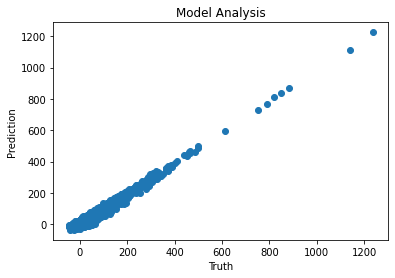

Linear Regression


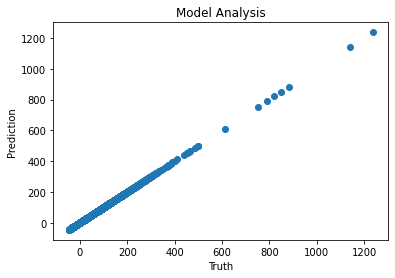

Ridge


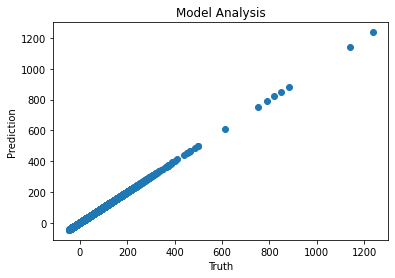

Random forest Regressor


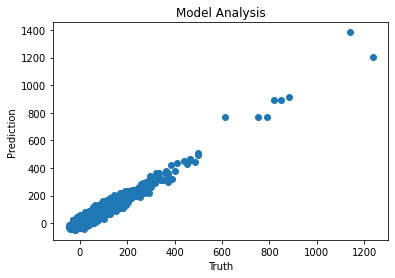

Decision Tree Regressor


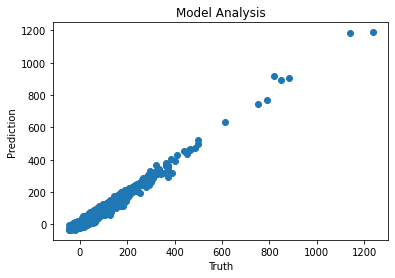

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Linear


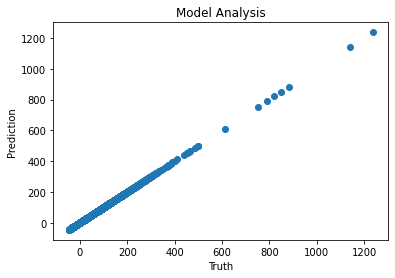

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Lasso


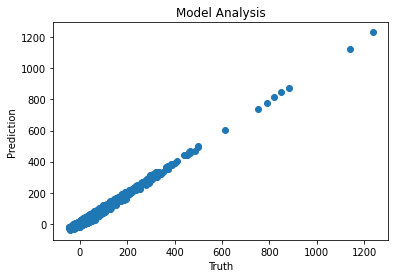

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Ridge


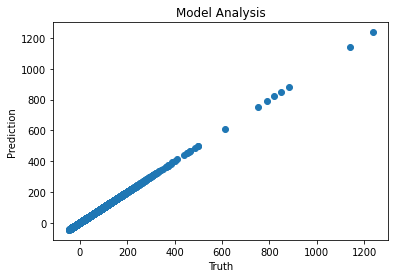

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Linear


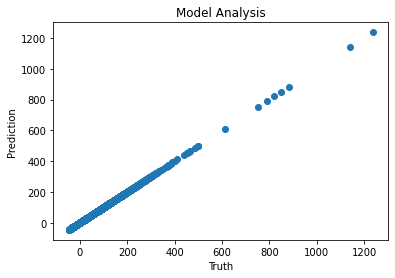

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Lasso


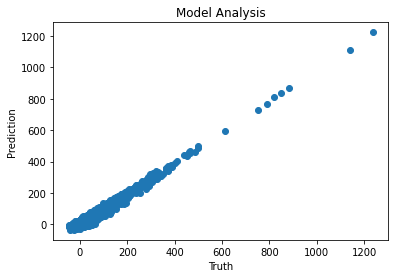

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Ridge


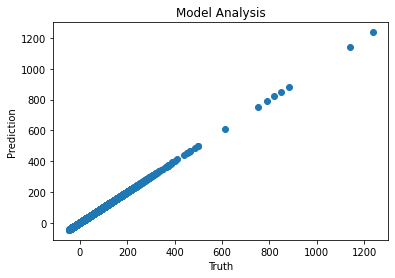

In [108]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    plt.scatter(y_test, Y_predict)
    plt.title("Model Analysis")
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.show()

NameError: ignored

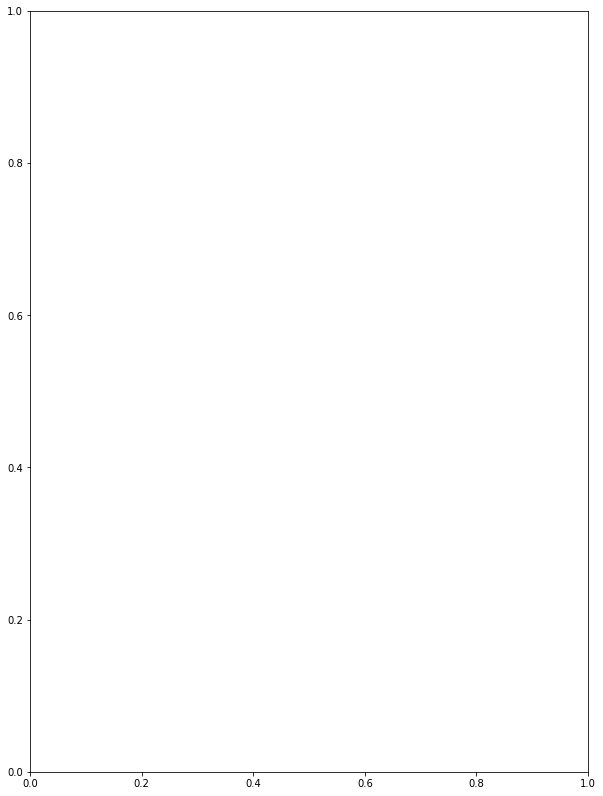

In [111]:
axis = plt.subplots(figsize=(10,14))
Name = Flight_Delays["AIRLINE"].unique()
size = Flight_Delays["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

In [ ]:
Flight_Delays

In [ ]:
Flight_Delays['ORIGIN_AIRPORT'] = Flight_Delays['ORIGIN_AIRPORT'].astype(str)
Flight_Delays['DESTINATION_AIRPORT'] = Flight_Delays['DESTINATION_AIRPORT'].astype(str)

In [ ]:
Flight_Delays['AIRLINE']= le.fit_transform(Flight_Delays['AIRLINE'])
Flight_Delays['ORIGIN_AIRPORT'] = le.fit_transform(Flight_Delays['ORIGIN_AIRPORT'])
Flight_Delays['DESTINATION_AIRPORT'] = le.fit_transform(Flight_Delays['DESTINATION_AIRPORT'])

In [ ]:
X = Flight_Delays.drop('ARRIVAL_DELAY',axis = 1)
X.shape
y = Flight_Delays['ARRIVAL_DELAY']
y.head()

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [125]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [116]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()

Lasso
Mean Absolute Error: 7.670202791137397
Mean Squared Error: 101.51853882513072
Root Mean Squared Error: 10.075640864239391
R2 :  0.956925085690737

Linear Regression
Mean Absolute Error: 1.5331813719785684e-13
Mean Squared Error: 4.0082608366111645e-26
Root Mean Squared Error: 2.0020641439801985e-13
R2 :  1.0

Ridge
Mean Absolute Error: 0.016688749774057852
Mean Squared Error: 0.0004675769423486762
Root Mean Squared Error: 0.021623527518623693
R2 :  0.9999998016043478

Random forest Regressor
Mean Absolute Error: 6.831076974084103
Mean Squared Error: 108.97607338232856
Root Mean Squared Error: 10.439160568854593
R2 :  0.9537608098281479

Decision Tree Regressor
Mean Absolute Error: 4.624400729402663
Mean Squared Error: 50.72798331215119
Root Mean Squared Error: 7.122357988205254
R2 :  0.9784758177221546



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Linear
Mean Absolute Error: 5.02904220879528e-14
Mean Squared Error: 4.3015453111212265e-27
Root Mean Squared Error: 6.55861670714277e-14
R2 :  1.0



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Lasso
Mean Absolute Error: 4.803060852871847
Mean Squared Error: 39.352995677186456
Root Mean Squared Error: 6.2731966075667085
R2 :  0.9833022920126193



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Ridge
Mean Absolute Error: 0.005906991846233567
Mean Squared Error: 5.787883138150365e-05
Root Mean Squared Error: 0.00760781383720078
R2 :  0.9999999754416707



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Linear
Mean Absolute Error: 1.1114988639440448e-13
Mean Squared Error: 2.1207555924084516e-26
Root Mean Squared Error: 1.456281426238916e-13
R2 :  1.0



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Lasso
Mean Absolute Error: 7.674890742648523
Mean Squared Error: 101.63678357632749
Root Mean Squared Error: 10.081507009189027
R2 :  0.9568749137459447



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Ridge
Mean Absolute Error: 0.016765679377503596
Mean Squared Error: 0.0004717402953249371
Root Mean Squared Error: 0.021719583221713464
R2 :  0.9999997998378125



Lasso


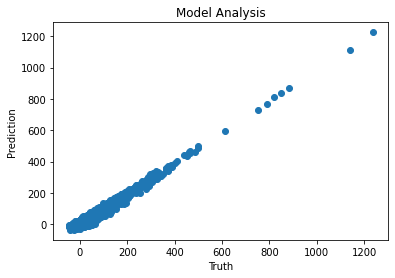

Linear Regression


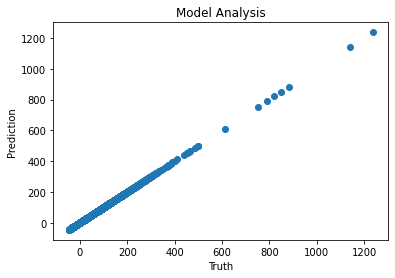

Ridge


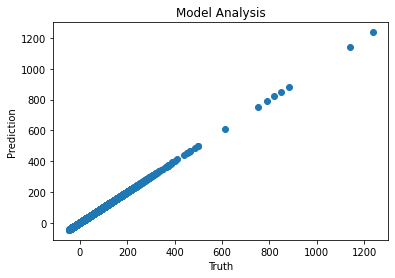

Random forest Regressor


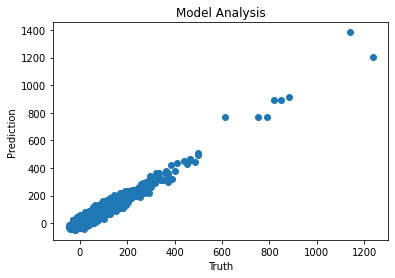

Decision Tree Regressor


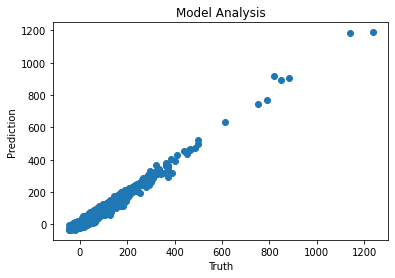

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Linear


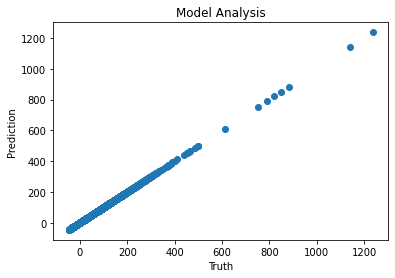

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Lasso


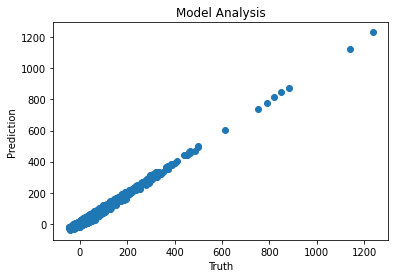

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Ridge


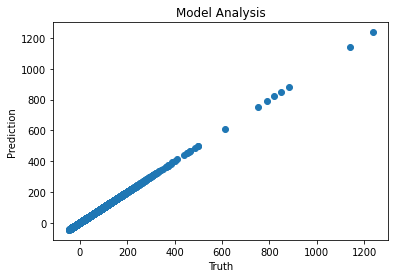

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Linear


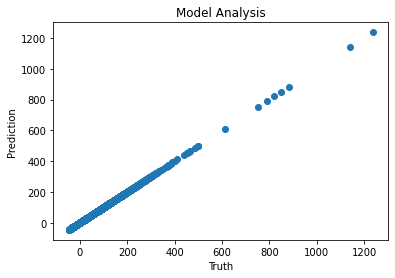

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Lasso


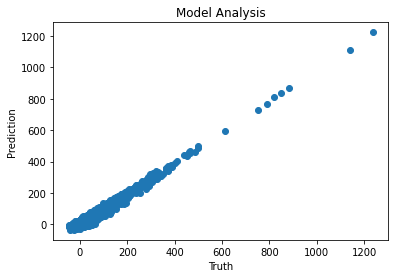

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Ridge


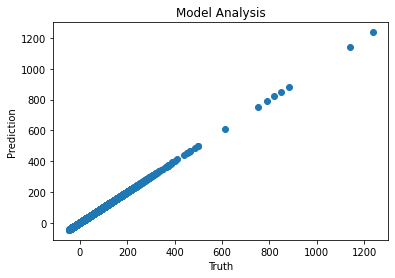

In [117]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    plt.scatter(y_test, Y_predict)
    plt.title("Model Analysis")
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.show()